### Steam_Games

In [81]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (25.0, 15.0)

In [265]:
# funzione usate 

def remove_duplicates(l):
    seen = {}
    res = []
    for item in l:
        if item not in seen:
            seen[item] = 1
            res.append(item)
    return res

def compare(list1, list2):
    result=[]
    for element in list1: 
        if (element in list2):
            i= 1  
        else:
            result.append(element)      
    return result

In [252]:
df = pd.read_csv('steam200k.csv',header=None,names=['UserID','Games','Action','Hours','Others'])
df.head()

,UserID,Games,Action,Hours,Others
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


### Analys

In [253]:
df.isnull().sum()

UserID    0
Games     0
Action    0
Hours     0
Others    0
dtype: int64

In [254]:
df.duplicated().sum()

707

In [255]:
df=df.drop_duplicates()

In [256]:
df.duplicated().sum()

0

In [257]:
df.describe()

,UserID,Hours,Others
count,1.992930e+05,199293.000000,199293.0
mean,1.037181e+08,17.934247,0.0
std,7.212048e+07,138.297952,0.0
min,5.250000e+03,0.100000,0.0
25%,4.738430e+07,1.000000,0.0
50%,8.691201e+07,1.000000,0.0
75%,1.542309e+08,1.400000,0.0
max,3.099031e+08,11754.000000,0.0


In [10]:
# classifica i giochi 

gamers= df.UserID.unique()

for g in gamers:
    mask_gamer=df['UserID']==g
    df_gamer=df[mask_gamer]
    df_gamer=df_gamer.groupby(df_gamer.Games)['Hours'].sum().sort_values(ascending= False)
    df_gamer=df_gamer.to_frame()
    df_gamer=df_gamer.reset_index()
    df_gamer['classifica']=df_gamer.index +1 
    games_user = df_gamer.Games.unique()
    for g_user in games_user:
        mask_2= ((df['UserID']== g) & (df['Games']== g_user))
        mask_3= df_gamer['Games']==g_user
        val=df_gamer[mask_3]['classifica']
        df.loc[mask_2,'PersonalOrder']= val.iloc[0]
        

In [15]:
#df.to_csv('PersonalOrder.csv',index= False)

In [16]:
# per calcolare il like 

for g in gamers: 
    mask_gamer=df['UserID']== g
    df_gamer=df[mask_gamer]
    param = df_gamer['Hours'].mean()
    games_user = df_gamer.Games.unique()
    for g_user in games_user:
        mask_2= ((df['UserID']== g) & (df['Games']== g_user))
        mask_3= df_gamer['Games']==g_user
        param_2 = df_gamer[mask_3]['Hours'].sum()
        if (param_2 >= param) :
            val=1
            df.loc[mask_2,'Like']= val
        else:
            df.loc[mask_2,'Like']= 0

In [23]:
#df.to_csv('like.csv')

In [55]:
# valutare lo score fra 3 e 5 
for g in gamers:
    mask_gamer=(df['UserID']== g) & (df['Like'] == 1) & (df['Action'] == 'play')
    df_gamer=df[mask_gamer].sort_values('PersonalOrder', ascending=True)
    df1, df2, df3 = np.array_split(df_gamer, 3)
    list_1 = df1.Games.unique()
    list_2 = df2.Games.unique()
    list_3 = df3.Games.unique()
    for game in list_1:
        mask_2= ((df['UserID']== g) & (df['Games']== game))
        df.loc[mask_2,'Score']= 5
    for game_2 in list_2:  
        mask_2= ((df['UserID']== g) & (df['Games']== game_2))
        df.loc[mask_2,'Score']= 4
    for game_3 in list_3:  
        mask_2= ((df['UserID']== g) & (df['Games']== game_3))
        df.loc[mask_2,'Score']= 3


In [70]:
# # valutare lo score fra 1 e 2 
for g in gamers:
    mask_gamer=(df['UserID']== g) & (df['Like'] == 0) & (df['Action'] == 'play')
    df_gamer=df[mask_gamer].sort_values('PersonalOrder', ascending=True)
    list_1 = df_gamer.Games.unique()
    for n in list_1:
        mask_giocho= df_gamer['Games']==n 
        h=df_gamer[mask_giocho]['Hours'].min()
        mask_2= ((df['UserID']== g) & (df['Games']== n))
        if(h <= 1 ):
            df.loc[mask_2,'Score']= 1
        else:
             df.loc[mask_2,'Score']= 2
    



In [75]:
# df.to_csv('stream_finale.csv',index=False)

In [8]:
df_finale=pd.read_csv('stream_finale.csv')
df_finale.head()

,UserID,Games,Action,Hours,Others,PersonalOrder,Like,Score
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0,1.0,1.0,5.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0,1.0,1.0,5.0
2,151603712,Fallout 4,purchase,1.0,0,2.0,1.0,5.0
3,151603712,Fallout 4,play,87.0,0,2.0,1.0,5.0
4,151603712,Spore,purchase,1.0,0,3.0,1.0,5.0


In [14]:
# un DF che aggrega i giochi con le ore giochate e lo score  
df_games = df_finale.groupby(df_finale['Games'])['Hours','Score'].mean().sort_values(by='Score',ascending= False)

C:\Users\moham\AppData\Local\Temp/ipykernel_14204/2963568271.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_games = df_finale.groupby(df_finale['Games'])['Hours','Score'].mean().sort_values(by='Score',ascending= False)


In [311]:
# un DF per contare i numeri dei giocatori che hanno giocato un gioco 
df_ID= df_finale.groupby(df_finale['Games'])['UserID'].nunique()
#df_ID = df_ID.to_frame()
df_ID= df_ID.reset_index()

In [312]:
# un DF per contare le ore dei giocatori che hanno giocato un gioco 
df_Hours= df_finale.groupby(df_finale['Games'])['Hours'].sum()
df_Hours= df_Hours.reset_index()

In [313]:
# un DF di passaggio 
result= pd.merge(df_games,df_ID ,how = 'inner',on='Games')

In [314]:
# DF finale che contiene tutti dati 
result_finale= pd.merge(result,df_Hours,how = 'inner',on='Games')

In [315]:
# ordinare per i giochi più popolare 
result_finale.sort_values(by='UserID',ascending=False,inplace= True)

In [316]:
result_finale.set_index('Games', inplace=True)

In [317]:
result_finale.head()

,Hours_x,Score,UserID,Hours_y
Games,,,,
Dota 2,101.892749,4.563520,4841,986525.6
Team Fortress 2,37.881253,3.716746,2323,175996.3
Unturned,6.709498,3.270346,1563,17659.4
Counter-Strike Global Offensive,116.236501,4.097313,1412,324183.6
Half-Life 2 Lost Coast,1.006390,1.451977,981,1165.4


In [318]:
# rinomino le colonne per chiarezza 
result_finale.rename(columns={'Hours_x':'mean_Hours','UserID':'Total_players','Hours_y':'Total_Huors'},inplace = True)

<AxesSubplot:xlabel='Games'>

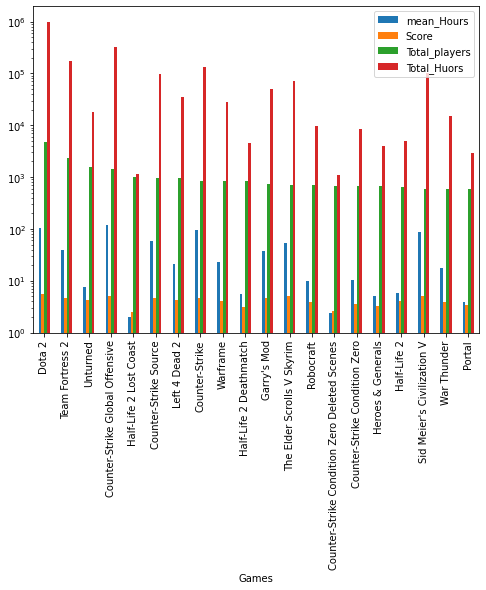

In [319]:
# I giochi con più giocatori 
result_finale[:20].plot(kind='bar', log=True, figsize=(8,6))

In [320]:
print('Number of gamers : {}'.format(len(df_finale.UserID.unique())))
print('Number of games : {}'.format(len(df_finale.Games.unique())))
print('Number of games purchased : {}'.format(len(df_finale.loc[df_finale['Action']=='purchase'])))
print('Number of games played : {}'.format(len(df_finale[df_finale['Action']=='play'])))

Number of gamers : 12393
Number of games : 5155
Number of games purchased : 128804
Number of games played : 70489


In [321]:
# Algoritmo per raccomandare i giochi 
def racomand(user):
        # trovare gli utenti con lo stesso gusto 
        users=[]
        found_games=[]
        
        # trovare i giochi preferiti per l'utente 
        mask_u = ((df_finale['UserID']== user) & (df_finale['Like']== 1) & (df_finale['Score']>= 3) & (df_finale['PersonalOrder']<= 5))
        u_games=df_finale[mask_u]['Games'].unique()
        u_games = u_games.tolist()
        # Salvo tutti i giochi per l'utente per non suggerire duppione 
        mask_u_totale = (df_finale['UserID']== user) 
        to_delete = df_finale[mask_u_totale]['Games'].unique().tolist()
        
        # utenti a cui piaciano gli stessi giochi di user
        for g in u_games:
            mask_g = ((df_finale['Games']== g) & (df_finale['Like']== 1) & (df_finale['Score']>= 3) & (df_finale['PersonalOrder']<= 5))
            u = df_finale[mask_g]['UserID'].unique().tolist()
            users += u
            
        # creare una lista con gli utenti trovati 
        users =  remove_duplicates(users)
        
        # trovare i giochi preferiti per ogni utente 
        for u in users :
            mask_u_2= ((df_finale['UserID']== u) & (df_finale['Like']== 1) & (df_finale['Score']>= 3) & (df_finale['PersonalOrder']<= 5))
            f_g= df_finale[mask_u_2]['Games'].unique().tolist()
            found_games += f_g

        found_games = remove_duplicates(found_games)
        # Toglgo dei lista dei consegliati i giochi che l'utente ha già
        to_racomand= compare(found_games,to_delete)
        # Prendo i primi 10 giochi migliori da consegliare all'utente 
        to_racomand =  pd.DataFrame (to_racomand, columns = ['Games'])
        df_racomand = pd.merge(result_finale, to_racomand,how ='inner',on='Games')
        # Riordinare i giochi secondo Total_players
        Racomanded_Games = df_racomand.sort_values(by='Total_players',ascending=False)[:10]
        # Risultato 
        return print(Racomanded_Games[['Games','Score','Total_players']])

In [333]:
racomand(39622853)

                           Games     Score  Total_players
0                         Dota 2  4.563520           4841
1                       Unturned  3.270346           1563
2          Counter-Strike Source  3.681119            978
3                 Counter-Strike  3.718310            856
4                       Warframe  3.056604            847
5                    Garry's Mod  3.566066            731
6                      Robocraft  2.818182            689
7  Counter-Strike Condition Zero  2.613333            679
8              Heroes & Generals  2.295522            658
9                    War Thunder  2.887789            590


In [334]:
mask= (df_finale['UserID']==39622853)
df_finale[mask].sort_values(by='PersonalOrder')[:5]

,UserID,Games,Action,Hours,Others,PersonalOrder,Like,Score
28401,39622853,The Witcher 3 Wild Hunt,purchase,1.0,0,1.0,1.0,5.0
28402,39622853,The Witcher 3 Wild Hunt,play,125.0,0,1.0,1.0,5.0
28403,39622853,PAYDAY 2,purchase,1.0,0,2.0,1.0,5.0
28404,39622853,PAYDAY 2,play,118.0,0,2.0,1.0,5.0
28405,39622853,Team Fortress 2,purchase,1.0,0,3.0,1.0,5.0


In [332]:
df_finale.sample()

,UserID,Games,Action,Hours,Others,PersonalOrder,Like,Score
28532,39622853,The Walking Dead,play,4.7,0,67.0,0.0,2.0
